In [1]:
import bilinear
from keras import models, applications

Using TensorFlow backend.


In [2]:
base_vgg = applications.vgg19.VGG19(include_top=False)
base_vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [3]:
# note that these will have the same output_shape for a given input_shape
modelA = models.Model(inputs=base_vgg.input,
                      outputs=base_vgg.get_layer('block5_conv4').output)

modelB = models.Model(inputs=base_vgg.input, 
                      outputs=base_vgg.get_layer('block5_conv3').output)

## Asymmetric BCNN Example

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
model_1 (Model)                 multiple             20024384    input_5[0][0]                    
__________________________________________________________________________________________________
model_2 (Model)                 multiple             17664576    input_5[0][0]                    
__________________________________________________________________________________________________
bilinear_pooling (Lambda)       (None, 512, 512)     0           model_1[6][0]                    
                                                                 model_2[2][0]                    
__________

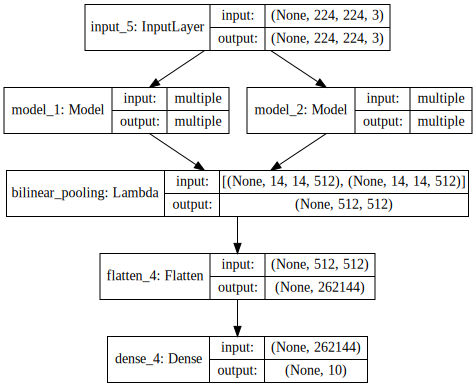

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

asymm_model = bilinear.combine(modelA, modelB, (224, 224, 3), 10)
asymm_model.summary()

SVG(model_to_dot(asymm_model, show_shapes=True).create(prog='dot', format='svg'))

## Symmetric BCNN Example

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
model_1 (Model)                 multiple             20024384    input_4[0][0]                    
__________________________________________________________________________________________________
bilinear_pooling (Lambda)       (None, 512, 512)     0           model_1[5][0]                    
                                                                 model_1[5][0]                    
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 262144)       0           bilinear_pooling[0][0]           
__________

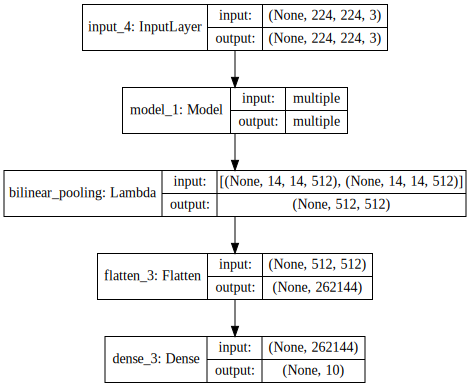

In [6]:
symm_model = bilinear.combine(modelA, None, (224, 224, 3), 10)
symm_model.summary()

SVG(model_to_dot(symm_model, show_shapes=True).create(prog='dot', format='svg'))